### 🔍 Dataset Features Breakdown

**1. Shipment & Trade Information**
| Feature     | Description |
|-------------|-------------|
| `YEAR`      | Year of shipment |
| `MONTH`     | Shipment month |
| `TRDTYPE`   | Trade type: 1 = Export, 2 = Import |
| `COMMODITY2`| 2-digit commodity classification |

**2. Geographic Origins & Destinations**
| Feature     | Description |
|-------------|-------------|
| `USASTATE`  | U.S. state code for shipment |
| `MEXSTATE`  | Mexican state code (if applicable) |
| `CANPROV`   | Canadian province code (if applicable) |
| `COUNTRY`   | Country code (e.g., Canada = 1220, Mexico = 2010) |
| `DEPE`      | Code for port/district where shipment is processed |

**3. Transportation Logistics**
| Feature     | Description |
|-------------|-------------|
| `DISAGMOT`  | Mode of transport (1 = Vessel, 3 = Air, 5 = Truck, etc.) |
| `CONTCODE`  | Indicates if shipment is containerized (X = Yes, 0 = No) |

**4. Economic & Cost Metrics**
| Feature         | Description |
|------------------|-------------|
| `VALUE`          | Monetary value of shipment (USD) |
| `SHIPWT`         | Shipping weight (Kg) |
| `FREIGHT_CHARGES`| Freight costs (USD) |
| `DF`             | 1 = Domestic product, 2 = Foreign product |

--- 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#checking folder content
csv_dir = "C:/Users/Aisha Kanyiti/Desktop/Azubi Frieght Project/ALL YEARS"
files = [f for f in os.listdir(csv_dir) if f.endswith(".csv")]

print(files)


['cleaned_transborder_freight_data_2020.csv', 'cleaned_transborder_freight_data_2021.csv', 'cleaned_transborder_freight_data_2022.csv', 'cleaned_transborder_freight_data_2023.csv', 'cleaned_transborder_freight_data_2024.csv']


In [3]:
csv_dir = "C:/Users/Aisha Kanyiti/Desktop/Azubi Frieght Project/ALL YEARS"

# Get a list of all .csv files in the directory
csv_files = [file for file in os.listdir(csv_dir) if file.endswith(".csv")]

# Create an empty list to hold DataFrames
all_dataframes = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    
    try:
        df = pd.read_csv(file_path)
        df["source_file"] = file  # Add filename for tracking origin
        all_dataframes.append(df)
    except Exception as e:
        print(f"⚠️ Could not read {file}: {e}")

# Combine all DataFrames into one
df = pd.concat(all_dataframes, ignore_index=True)



In [4]:
df.drop(['source_file'],inplace=True,axis=1)

In [6]:
df.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,Province Unknown,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,January,2020,84.0
1,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,January,2020,84.0
2,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,January,2020,84.0
3,Export,Alaska,20XX,Air,Province Unknown,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,January,2020,84.0
4,Export,Alaska,20XX,Air,Province Unknown,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,January,2020,84.0


In [7]:
df.isna().sum()

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6563755 entries, 0 to 6563754
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          object 
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         object 
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          object 
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               object 
 11  CONTCODE         object 
 12  MONTH            object 
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(1), int64(4), object(10)
memory usage: 751.2+ MB


In [9]:
df.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES,YEAR,COMMODITY2
count,6.563755e+06,6.563755e+06,6.563755e+06,6.563755e+06,6.563755e+06
mean,2.943800e+06,1.205265e+06,3.853602e+04,2.022021e+03,6.304040e+01
std,3.785580e+07,4.068276e+07,1.022788e+06,1.329423e+00,2.695962e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+00
25%,1.434100e+04,0.000000e+00,0.000000e+00,2.021000e+03,3.900000e+01
50%,7.226700e+04,0.000000e+00,2.690000e+02,2.022000e+03,7.400000e+01
75%,4.350175e+05,2.592000e+03,2.920000e+03,2.023000e+03,8.400000e+01
max,5.595625e+09,9.068700e+09,2.487214e+08,2.024000e+03,9.900000e+01


In [10]:
df.duplicated().sum()

np.int64(6771)

In [11]:
data = df.drop_duplicates() #Dropping duplicates
data

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,Province Unknown,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,January,2020,84.0
1,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,January,2020,84.0
2,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,January,2020,84.0
3,Export,Alaska,20XX,Air,Province Unknown,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,January,2020,84.0
4,Export,Alaska,20XX,Air,Province Unknown,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,January,2020,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563750,Import,State Unknown,55XX,Truck,Province Unknown,Ontario,Canada,4384342,7399,1883,domestically produced merchandise,Non-Containerized,September,2024,98.0
6563751,Import,State Unknown,55XX,Other,Province Unknown,Ontario,Canada,50211,6350,3500,domestically produced merchandise,Non-Containerized,September,2024,98.0
6563752,Import,State Unknown,60XX,Other,Province Unknown,Ontario,Canada,793390,80,500,domestically produced merchandise,Non-Containerized,September,2024,89.0
6563753,Import,State Unknown,70XX,Other,Province Unknown,Ontario,Canada,233990301,0,0,domestically produced merchandise,Non-Containerized,September,2024,99.0


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.isnull().sum()

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64

In [14]:
# Dictionary mapping commodity 2-digit codes to descriptions
commodity_map = {
    1: 'Live animals', 2: 'Meat', 3: 'Fish', 4: 'Dairy, Honey, etc.',
    5: 'Other animal products', 6: 'Live plants', 7: 'Vegetables',
    8: 'Fruits and nuts', 9: 'Coffee, tea, spices', 10: 'Cereals',
    11: 'Milling products', 12: 'Oil seeds', 13: 'Gums and resins',
    14: 'Veg. plaiting', 15: 'Fats and oils', 16: 'Prepared meat/fish',
    17: 'Sugar', 18: 'Cocoa', 19: 'Cereal preparations', 20: 'Veg./fruit preparations',
    21: 'Misc. edible', 22: 'Beverages', 23: 'Food waste/feed', 24: 'Tobacco',
    25: 'Salt/stone/cement', 26: 'Ores', 27: 'Mineral fuels', 28: 'Inorganic chemicals',
    29: 'Organic chemicals', 30: 'Pharma products', 31: 'Fertilizers',
    32: 'Dyes & paints', 33: 'Essential oils & cosmetics', 34: 'Soaps & waxes',
    35: 'Starches, glues, enzymes', 36: 'Explosives & matches', 37: 'Photographic goods',
    38: 'Misc chemicals', 39: 'Plastics', 40: 'Rubber', 41: 'Raw hides & leather',
    42: 'Leather articles', 43: 'Furskins', 44: 'Wood', 45: 'Cork', 46: 'Basketware',
    47: 'Pulp & scrap paper', 48: 'Paper articles', 49: 'Books & printed goods',
    50: 'Silk', 51: 'Wool', 52: 'Cotton', 53: 'Other textiles', 54: 'Man-made filaments',
    55: 'Man-made fibers', 56: 'Ropes & twine', 57: 'Carpets', 58: 'Special woven fabrics',
    59: 'Industrial textiles', 60: 'Knitted fabrics', 61: 'Knit apparel', 62: 'Woven apparel',
    63: 'Other textile articles', 64: 'Footwear', 65: 'Headgear', 66: 'Umbrellas & sticks',
    67: 'Feathers & artificial flowers', 68: 'Stone & cement articles', 69: 'Ceramics',
    70: 'Glassware', 71: 'Jewelry & coins', 72: 'Iron & steel', 73: 'Iron/steel articles',
    74: 'Copper', 75: 'Nickel', 76: 'Aluminum', 77: 'Reserved', 78: 'Lead',
    79: 'Zinc', 80: 'Tin', 81: 'Other base metals', 82: 'Tools & cutlery',
    83: 'Misc base metal', 84: 'Machinery', 85: 'Electrical machinery', 86: 'Railway equipment',
    87: 'Vehicles', 88: 'Aircraft', 89: 'Ships', 90: 'Instruments', 91: 'Watches',
    92: 'Musical instruments', 93: 'Arms & ammo', 94: 'Furniture & prefab', 95: 'Toys & sports',
    96: 'Misc manufactured', 97: 'Art & antiques', 98: 'Special classification', 99: 'Temporary (imports only)'
}


# Apply the mapping to the 'Commodity' column
# Convert COMMODITY2 to integer before mapping
data['COMMODITY2'] = data['COMMODITY2'].astype('Int64').map(commodity_map)

### FEATURE ENGINEERING

In [15]:
# 1️ Create unified Location column
#data["Location"] = data["USASTATE"].fillna(
    #data["MEXSTATE"].fillna(data["CANPROV"])
#)

In [16]:
# 2️ Create COUNTRY column based on where Location came from
#def infer_country(row):
    #if pd.notna(row["USASTATE"]):
        #return "USA"
    #elif pd.notna(row["MEXSTATE"]):
        #return "Mexico"
    #elif pd.notna(row["CANPROV"]):
        #return "Canada"
    #else:
        #return None

#data["COUNTRY"] = data.apply(infer_country, axis=1)

In [18]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,Province Unknown,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,January,2020,Machinery
1,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,January,2020,Machinery
2,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,January,2020,Machinery
3,Export,Alaska,20XX,Air,Province Unknown,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,January,2020,Machinery
4,Export,Alaska,20XX,Air,Province Unknown,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,January,2020,Machinery


# EDA

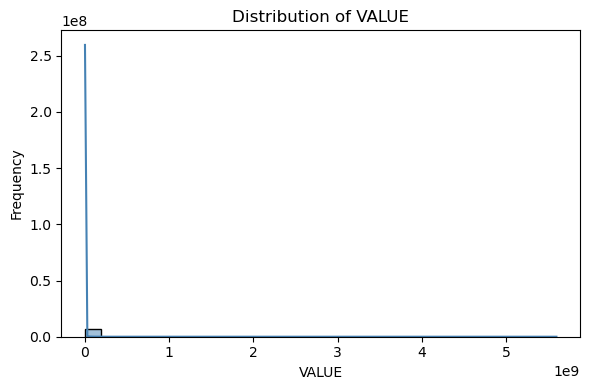

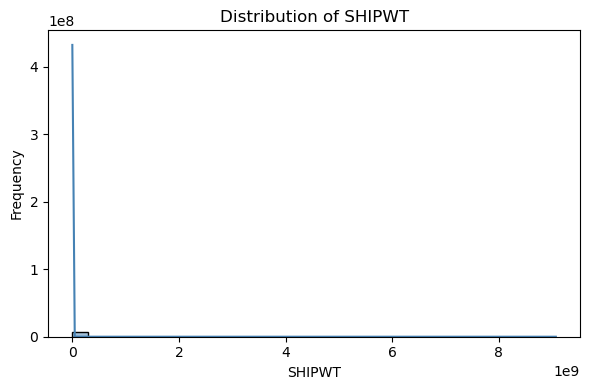

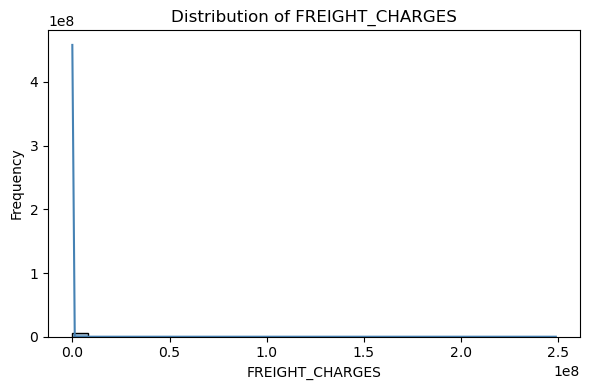

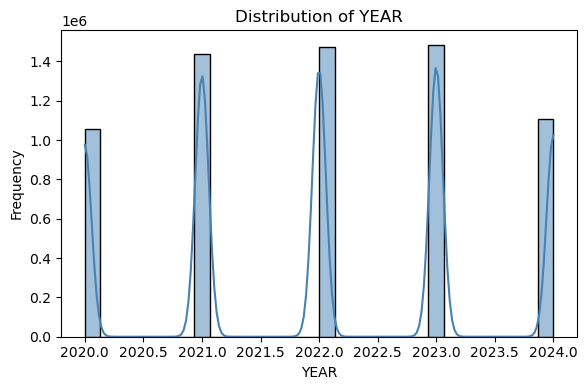

In [19]:

numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()

# Drop MonthNumber if it’s not actually there
if 'MonthNumber' in numerical_cols and 'MonthNumber' not in data.columns:
    numerical_cols.remove('MonthNumber')


# Plot numerical distributions
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()





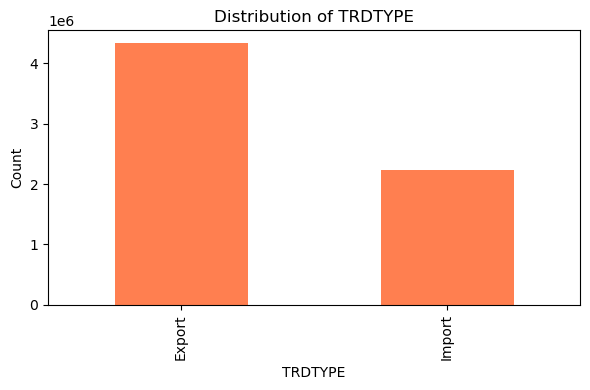

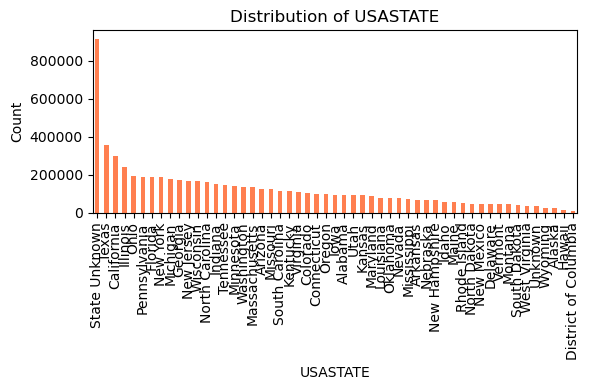

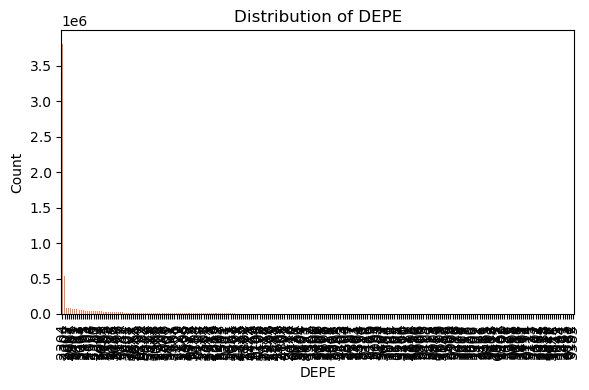

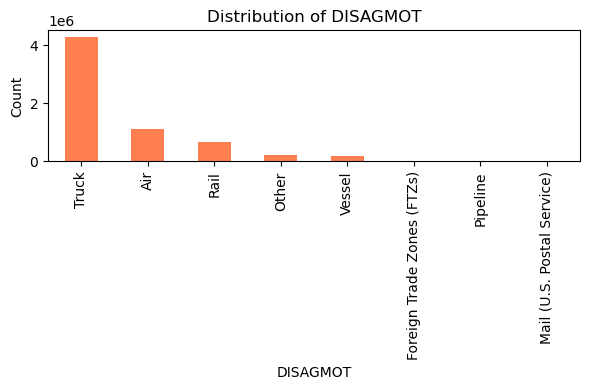

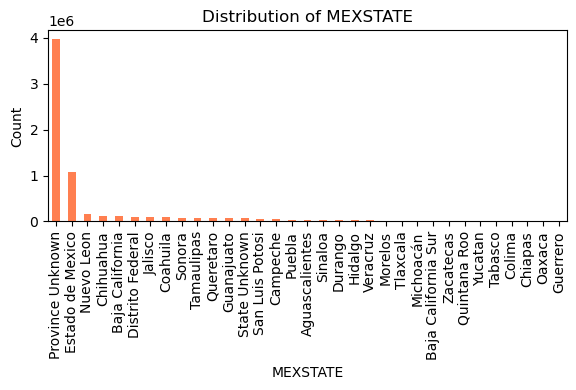

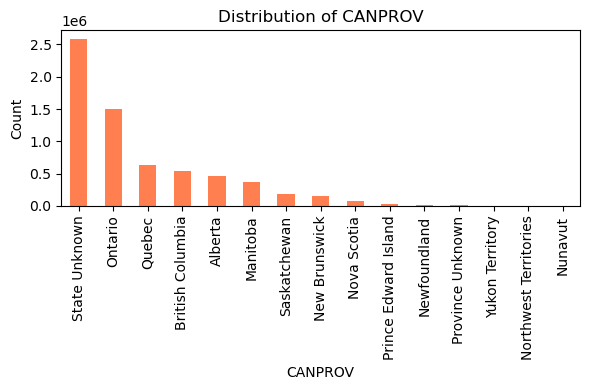

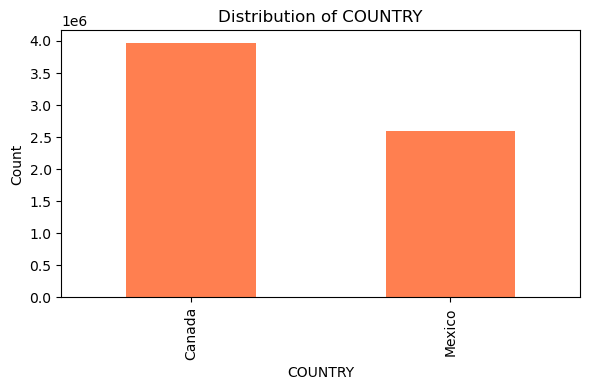

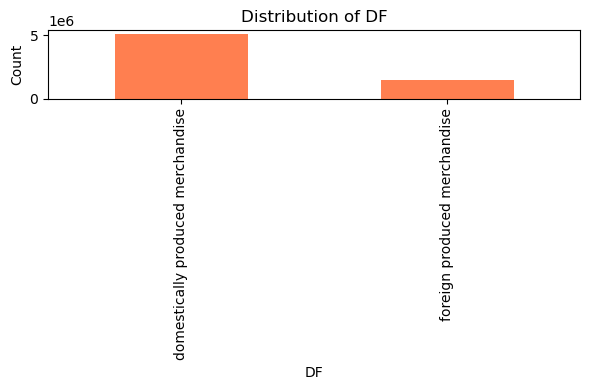

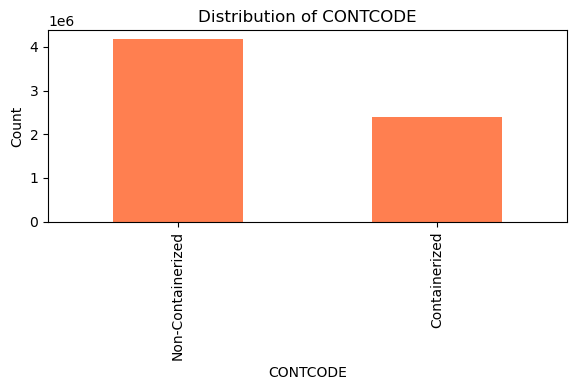

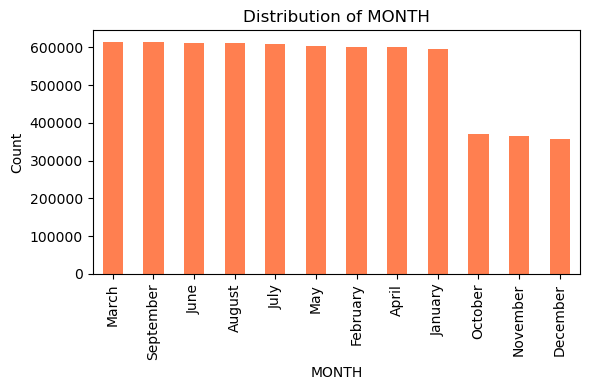

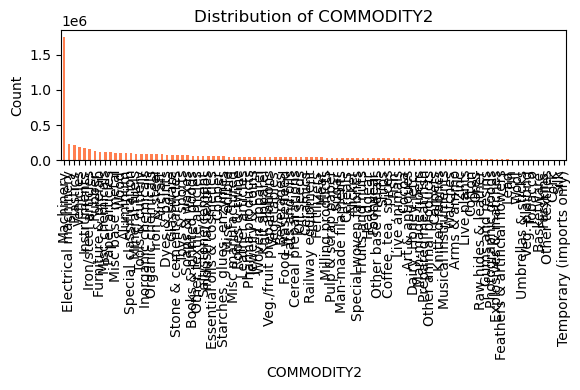

In [20]:
# Plot categorical distributions
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    data[col].value_counts().plot(kind="bar", color="coral")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

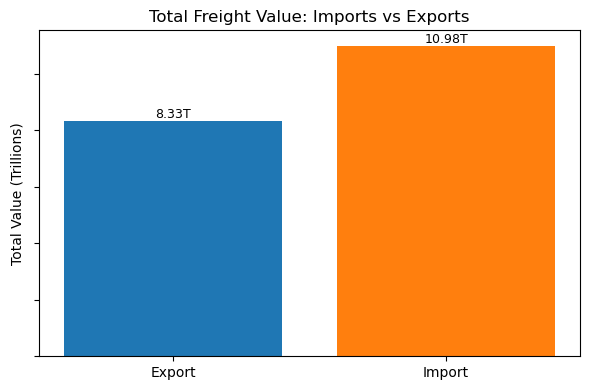

In [21]:
import matplotlib.pyplot as plt

import_export = data.groupby("TRDTYPE")["VALUE"].sum()
import_export_T = import_export / 1_000_000_000_000

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(import_export_T.index, import_export_T.values, color=['#1f77b4', '#ff7f0e'])

ax.set_title("Total Freight Value: Imports vs Exports")
ax.set_ylabel("Total Value (Trillions)")
ax.set_yticklabels([])

for i, v in enumerate(import_export_T.values):
    ax.text(i, v, f"{v:.2f}T", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


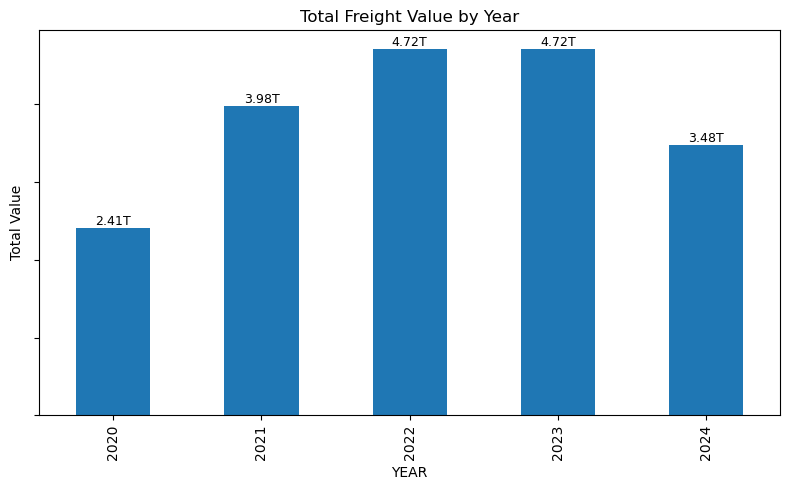

In [22]:
import matplotlib.pyplot as plt

# Aggregate data
freight_by_year = data.groupby("YEAR")["VALUE"].sum()

# Plot
ax = freight_by_year.plot(kind="bar", figsize=(8,5), title="Total Freight Value by Year")

# Y-axis label
ax.set_ylabel("Total Value")

# Remove y-axis tick labels
ax.set_yticklabels([])

# Add data labels with T, B, or M
for i, v in enumerate(freight_by_year):
    if v >= 1_000_000_000_000:
        label = f"{v/1_000_000_000_000:.2f}T"
    elif v >= 1_000_000_000:
        label = f"{v/1_000_000_000:.2f}B"
    else:
        label = f"{v/1_000_000:.2f}M"
    ax.text(i, v, label, ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()





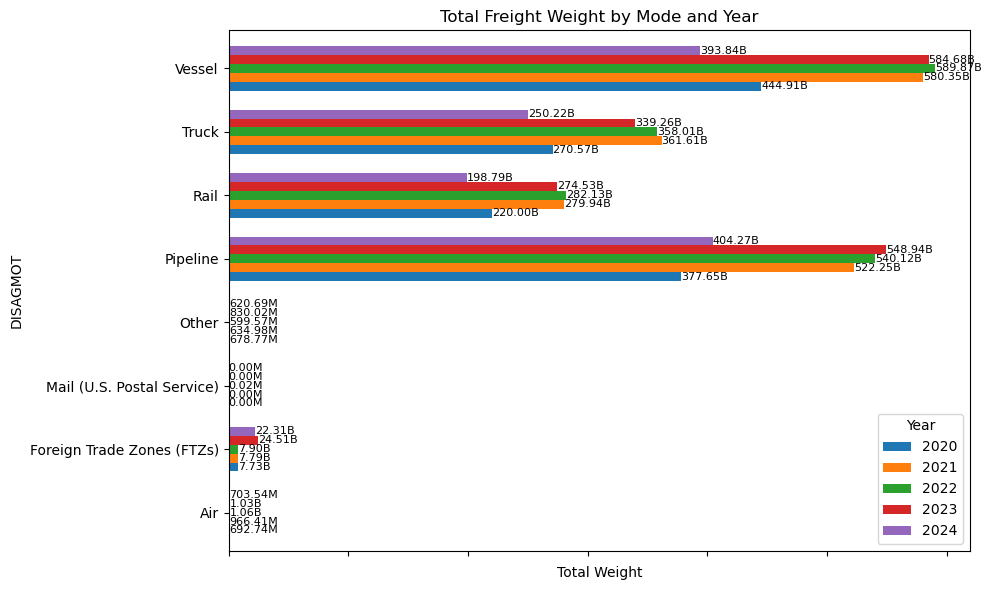

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate: total weight by mode & year
freight_by_mode_year = (
    data.groupby(["YEAR", "DISAGMOT"])["SHIPWT"]
    .sum()
    .reset_index()
)

# Convert to millions of tons
freight_by_mode_year["SHIPWT_Millions"] = freight_by_mode_year["SHIPWT"] / 1_000_000

# Pivot for plotting
pivot_df = freight_by_mode_year.pivot(index="DISAGMOT", columns="YEAR", values="SHIPWT_Millions")

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Use seaborn color palette
colors = sns.color_palette("tab10", n_colors=len(pivot_df.columns))

# Plot each year as a separate bar (grouped)
bars = pivot_df.plot(
    kind="barh", 
    ax=ax,
    color=colors,
    width=0.7
)

# Title and labels
ax.set_xlabel("Total Weight")
ax.set_title("Total Freight Weight by Mode and Year")
ax.legend(title="Year")

# Remove X-axis tick labels but keep axis label
ax.set_xticklabels([])

# Add data labels with M, B, T formatting
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0:
            if width >= 1_000_000:
                label = f"{width/1_000_000:.2f}T"
            elif width >= 1_000:
                label = f"{width/1_000:.2f}B"
            else:
                label = f"{width:.2f}M"
            ax.text(width, bar.get_y() + bar.get_height()/2, label, 
                    ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()





In [24]:
# Create a new DataFrame with the cleaned data
dataset = data.copy()

In [ ]:
#Convert file to Cleaded to CSV format
dataset.to_csv('cleaned_transborder_freight_data_FULL.csv', index=False)

In [ ]:
print("📆 Unique years in the dataset:")
print(data['YEAR'].unique())

# Show count of rows per year
print("\n📊 Row count per year:")
print(data['YEAR'].value_counts().sort_index())

In [ ]:
# pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport

# Create the profile report
# profile = ProfileReport(data, title="TransBorderFreight Data Profiling Report", explorative=True)

# Save it to an HTML file
# profile.to_file("freight_data_report.html")


In [ ]:
# Group by YEAR and sum VALUE
yearly_value = data.groupby("YEAR")["VALUE"].sum()

print(yearly_value)